In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
#plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import math
from sklearn.metrics import mean_squared_error
from random import random
import datetime

In [3]:
df = pd.read_excel("D:/AAU/Module_4/Project_mo_4/pune_tomato_market.xlsx")

In [4]:
df.head()

,Date,Arrival,Price
0,2010-01-03,70.4,1300.0
1,2010-01-04,70.4,1300.0
2,2010-01-05,70.4,1300.0
3,2010-01-06,70.4,1300.0
4,2010-01-07,70.4,1300.0


In [5]:
df.describe()

,Date,Arrival,Price
count,5017,5017.000000,5017.000000
mean,2016-11-15 00:00:00,161.125914,1161.181977
min,2010-01-03 00:00:00,0.100000,200.000000
25%,2013-06-10 00:00:00,111.000000,600.000000
50%,2016-11-15 00:00:00,147.700000,950.000000
75%,2020-04-22 00:00:00,194.000000,1350.000000
max,2023-09-28 00:00:00,2075.000000,8500.000000
std,NaN,97.563156,896.345939


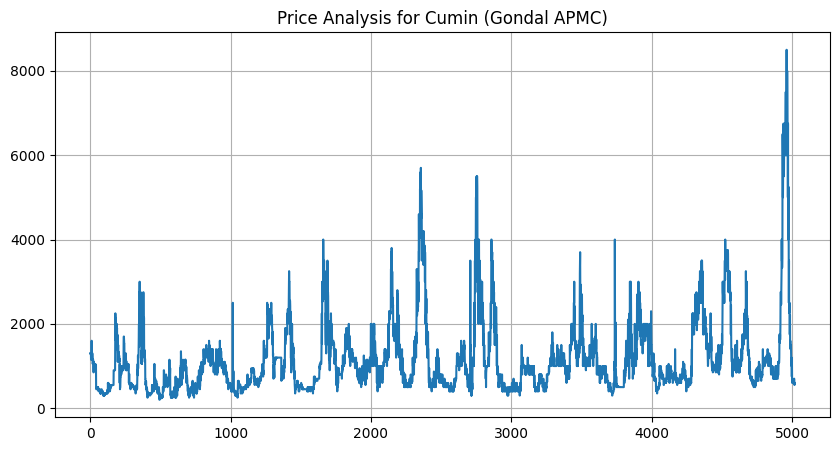

In [6]:
# Visualize
plt.figure(figsize=(10, 5))
plt.plot(df['Price'])
plt.title('Price Analysis for Cumin (Gondal APMC)')
plt.grid(True)
plt.show()

In [7]:
#H0
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Price'])

In [8]:
test_result

(-8.678276327383585,
 4.355821758975288e-14,
 31,
 4985,
 {'1%': -3.4316624715142177,
  '5%': -2.862119970102166,
  '10%': -2.5670787188546584},
 68531.004299004)

In [9]:
#H1
from statsmodels.tsa.stattools import adfuller
test_result1=adfuller(df['Price'].diff().dropna())
test_result1

(-12.073765765571434,
 2.315437653896153e-22,
 28,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 68588.61597139365)

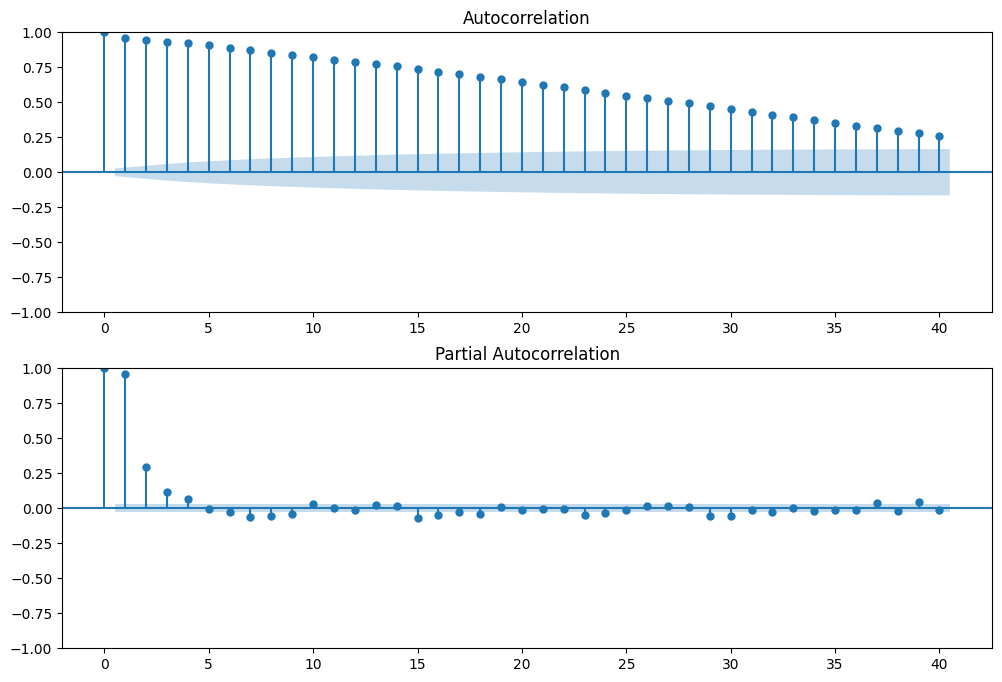

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Price'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price'], lags=40, ax=ax2)
plt.show()

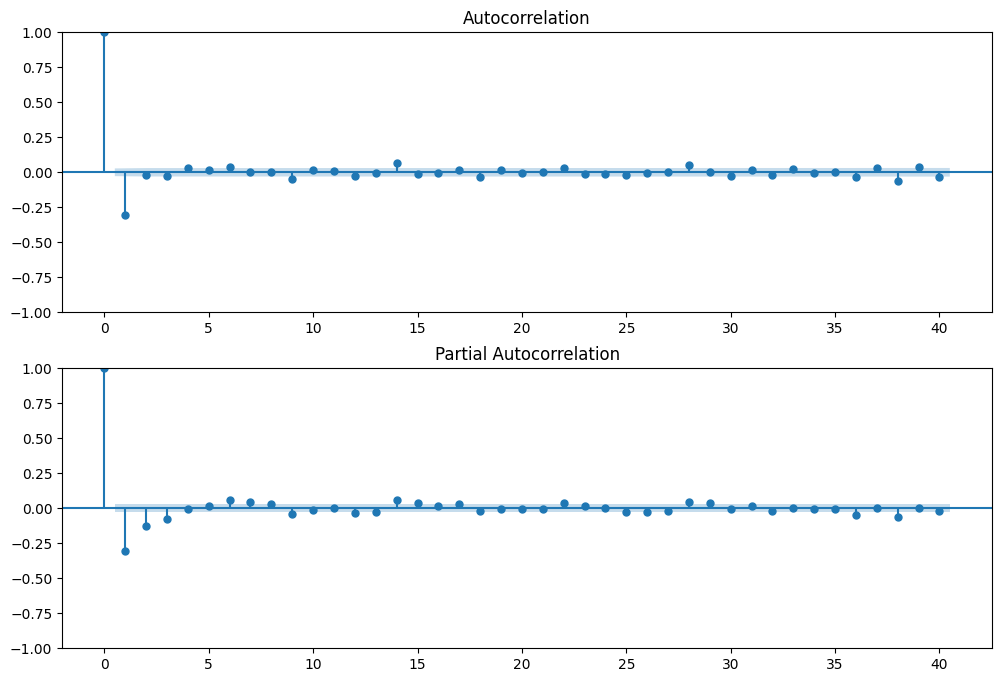

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#Plots with first order differenced Sales variable
fig = sm.graphics.tsa.plot_acf(df['Price'].diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Price'].diff().dropna(), lags=40, ax=ax2)
plt.show()

In [12]:
X = df['Price']
X = X.values
# Split the data into training and testing sets (e.g., 50% train, 50% test)
train_size = int(len(X) * 0.8)
train_data_new = X[:train_size]
test_data_new = X[train_size:]

In [13]:
# !pip install pmdarima

In [14]:
from pmdarima.arima import auto_arima

In [15]:
Sarima_model =  auto_arima(train_data_new,start_p=0, d=0, start_q=0,
                          max_p=3, max_d=3, max_q=3, start_P=0,
                          D=0, start_Q=0, max_P=3, max_D=3,
                          max_Q=3, m=7, seasonal=True,
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=64479.676, Time=0.17 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=55276.189, Time=3.64 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=59623.826, Time=5.63 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=68993.267, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=55276.366, Time=0.19 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=55273.365, Time=11.46 sec
 ARIMA(1,0,0)(3,0,0)[7] intercept   : AIC=55274.629, Time=20.36 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=55275.344, Time=15.46 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=55277.928, Time=8.21 sec
 ARIMA(1,0,0)(3,0,1)[7] intercept   : AIC=55276.570, Time=33.70 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=59790.339, Time=15.82 sec
 ARIMA(2,0,0)(2,0,0)[7] intercept   : AIC=54893.689, Time=10.51 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=54893.918, Time=5.13 sec
 ARIMA(2,0,0)(3,0,0)[7] intercept   : AIC=54894.611, Time=50.32 sec
 ARIMA(2,0,0

In [16]:
#Summary of the model
Sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 4013
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood              -27413.751
Date:                           Fri, 29 Nov 2024   AIC                          54839.503
Time:                                   21:26:50   BIC                          54877.287
Sample:                                        0   HQIC                         54852.894
                                          - 4013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     38.1611      9.493      4.020      0.000      19.555      56.767
ar.L1          0.9805      0.002    426.212      0.000       0.976       0.985
ma.L1         -0.3494      0.007    -50.401      0.000      -0.363      -0.336
ar.S.L7       -0.8093      0.085     -9.489      0.000      -0.977      -0.642
ma.S.L7        0.7770      0.091      8.585      0.000       0.600       0.954
sigma2      5.021e+04    368.432    136.287      0.000    4.95e+04    5.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             77578.22
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.99   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

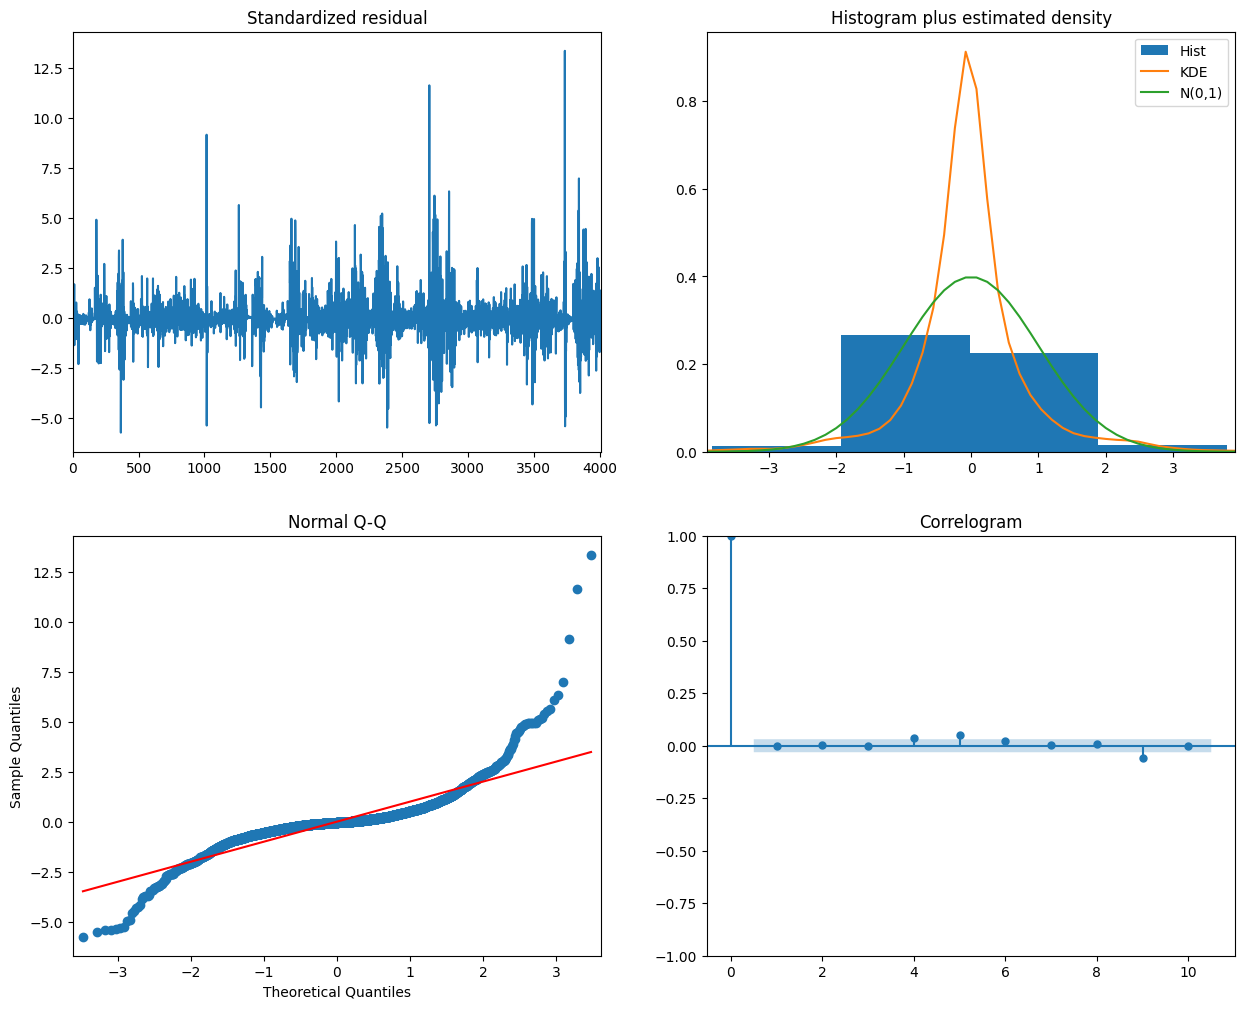

In [17]:
Sarima_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [18]:
train_data_new = pd.DataFrame({'Date': df['Date'][:train_size], 'Price': train_data_new})
test_data_new = pd.DataFrame({'Date': df['Date'][train_size:], 'Price': test_data_new})

In [19]:
train_data_new

,Date,Price
0,2010-01-03,1300.0
1,2010-01-04,1300.0
2,2010-01-05,1300.0
3,2010-01-06,1300.0
4,2010-01-07,1300.0
...,...,...
4008,2020-12-24,1000.0
4009,2020-12-25,1200.0
4010,2020-12-26,925.0
4011,2020-12-27,1300.0


In [20]:
test_data_new

,Date,Price
4013,2020-12-29,1000.0
4014,2020-12-30,1200.0
4015,2020-12-31,1000.0
4016,2021-01-01,850.0
4017,2021-01-02,1070.0
...,...,...
5012,2023-09-24,700.0
5013,2023-09-25,700.0
5014,2023-09-26,600.0
5015,2023-09-27,550.0


In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
from datetime import timedelta

In [23]:
# Make predictions on the training data
train_predictions_new, _ = Sarima_model.predict_in_sample(return_conf_int=True)

# Store the training predictions with dates
train_predictions_df_new = pd.DataFrame({'Date': train_data_new['Date'], 'Predicted_Price': train_predictions_new})
train_predictions_df_new.set_index('Date', inplace=True)

# Make predictions on the test data
test_predictions_new, conf_int =Sarima_model.predict(n_periods=len(test_data_new), return_conf_int=True)

# Store the test predictions with dates
test_predictions_df_new = pd.DataFrame({'Date': test_data_new['Date'], 'Predicted_Price': test_predictions_new})
test_predictions_df_new.set_index('Date', inplace=True)

# Forecast 10 steps ahead
forecast_steps = 100
forecast_new, conf_int_forecast =Sarima_model.predict(n_periods=forecast_steps, return_conf_int=True)

# Create a DataFrame for the forecasted values with future dates
future_dates = pd.date_range(df['Date'].max() + timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df_new = pd.DataFrame({'Date': future_dates, 'Forecasted_Price': forecast_new})
forecast_df_new.set_index('Date', inplace=True)

In [24]:
test_predictions_df_new

,Predicted_Price
Date,
2020-12-29,1073.697371
2020-12-30,1073.313223
2020-12-31,1045.109741
2021-01-01,1038.151683
2021-01-02,1065.664159
...,...
2023-09-24,1080.242227
2023-09-25,1080.242227
2023-09-26,1080.242227


In [25]:
forecast_df_new

,Forecasted_Price
Date,
2023-09-29,1073.697371
2023-09-30,1073.313223
2023-10-01,1045.109741
2023-10-02,1038.151683
2023-10-03,1065.664159
...,...
2024-01-02,1076.465067
2024-01-03,1077.773419
2024-01-04,1078.432600


In [26]:
forecast_df_new.shape

(100, 1)

In [27]:
train_data_new['Date'] = pd.to_datetime(train_data_new['Date'])
test_data_new['Date'] = pd.to_datetime(test_data_new['Date'])
train_predictions_df_new.index = pd.to_datetime(train_predictions_df_new.index)
test_predictions_df_new.index = pd.to_datetime(test_predictions_df_new.index)
forecast_df_new.index = pd.to_datetime(forecast_df_new.index)

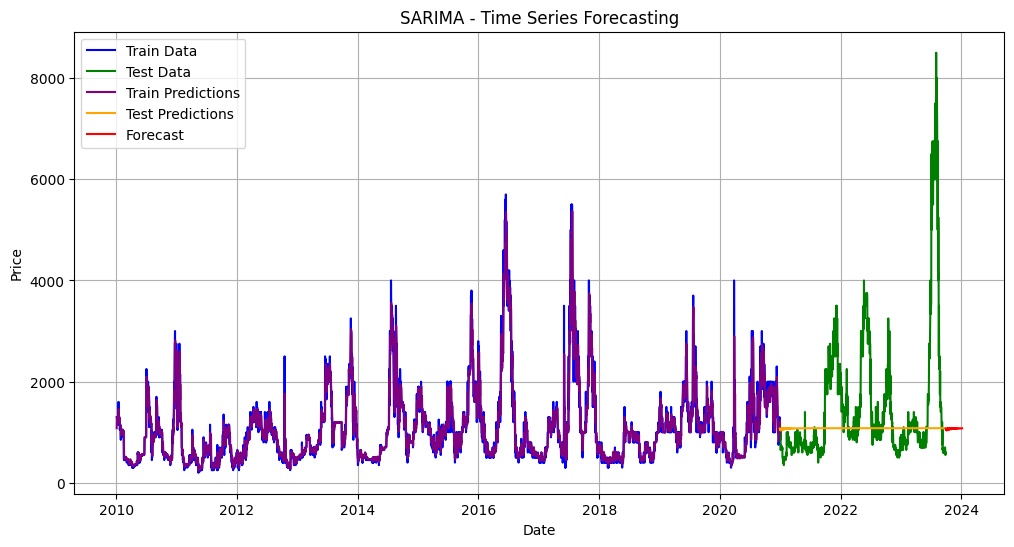

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(train_data_new['Date'], train_data_new['Price'], label='Train Data', color='blue')
plt.plot(test_data_new['Date'], test_data_new['Price'], label='Test Data', color='green')
plt.plot(train_predictions_df_new.index, train_predictions_df_new['Predicted_Price'], label='Train Predictions', color='purple')
plt.plot(test_predictions_df_new.index, test_predictions_df_new['Predicted_Price'], label='Test Predictions', color='orange')
plt.plot(forecast_df_new.index, forecast_df_new['Forecasted_Price'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('SARIMA - Time Series Forecasting')
plt.grid(True)
plt.show()

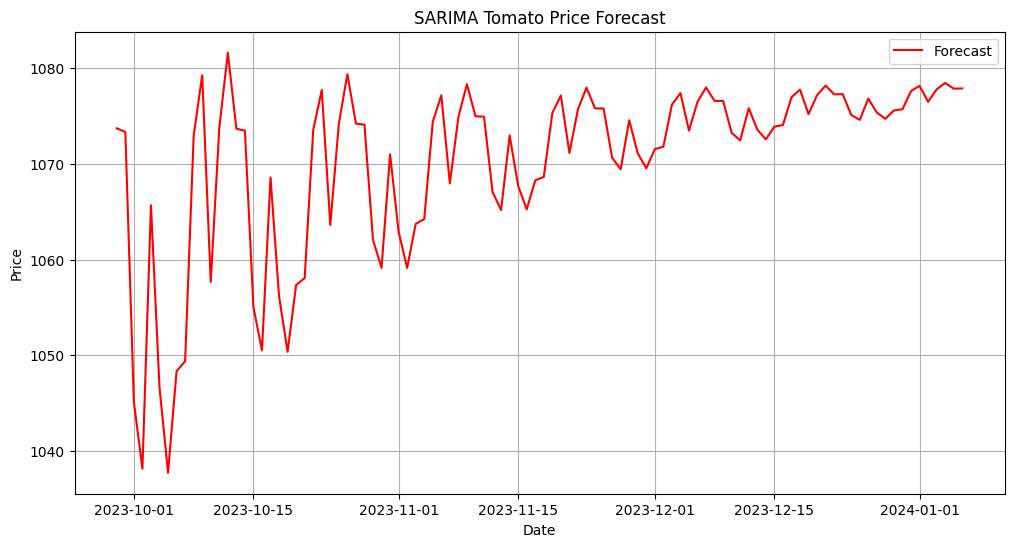

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_df_new.index, forecast_df_new['Forecasted_Price'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('SARIMA Tomato Price Forecast')
plt.grid(True)
plt.show()

In [30]:
test_predictions_df_new

,Predicted_Price
Date,
2020-12-29,1073.697371
2020-12-30,1073.313223
2020-12-31,1045.109741
2021-01-01,1038.151683
2021-01-02,1065.664159
...,...
2023-09-24,1080.242227
2023-09-25,1080.242227
2023-09-26,1080.242227


In [31]:
from sklearn.metrics import mean_squared_error
import math
from statistics import mean

rmse_auto_arima=math.sqrt(mean_squared_error(test_predictions_df_new['Predicted_Price'],test_data_new['Price']))
print('Mean value of price is : {}. Root Mean Squared Error is :{}'.format(mean(test_data_new['Price']),rmse_auto_arima))

Mean value of price is : 1502.424745462594. Root Mean Squared Error is :1350.0930922136738


In [36]:
from sklearn.metrics import mean_squared_error
y_true = test_data_new["Price"]
y_pred = test_predictions_df_new

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculate the range of the target variable
y_range = np.max(y_true) - np.min(y_true)

# Calculate the RMSE as a percentage of the range
rmse_percentage = (rmse / y_range) * 100

# Calculate NRMSE (normalized by mean of observed values)
nrmse = rmse / np.mean(y_true)
print(f'Normalized RMSE (NRMSE): {nrmse:.2f}')

print(f'Root Mean Squared Error (MSE) : {mse:.2f}')
print(f'Root Mean Squared Error (RMSE) : {rmse:.2f}')
print(f'Root Mean Squared Error (RMSE) as a percentage of the range: {rmse_percentage:.2f}%')

Normalized RMSE (NRMSE): 0.90
Root Mean Squared Error (MSE) : 1822751.36
Root Mean Squared Error (RMSE) : 1350.09
Root Mean Squared Error (RMSE) as a percentage of the range: 16.57%


In [33]:
# Convert the 'Date' column to datetime format
test_data_new['Date'] = pd.to_datetime(test_data_new['Date'])

# Set 'Date' as the index for time series analysis
test_data_new.set_index('Date',inplace=True)

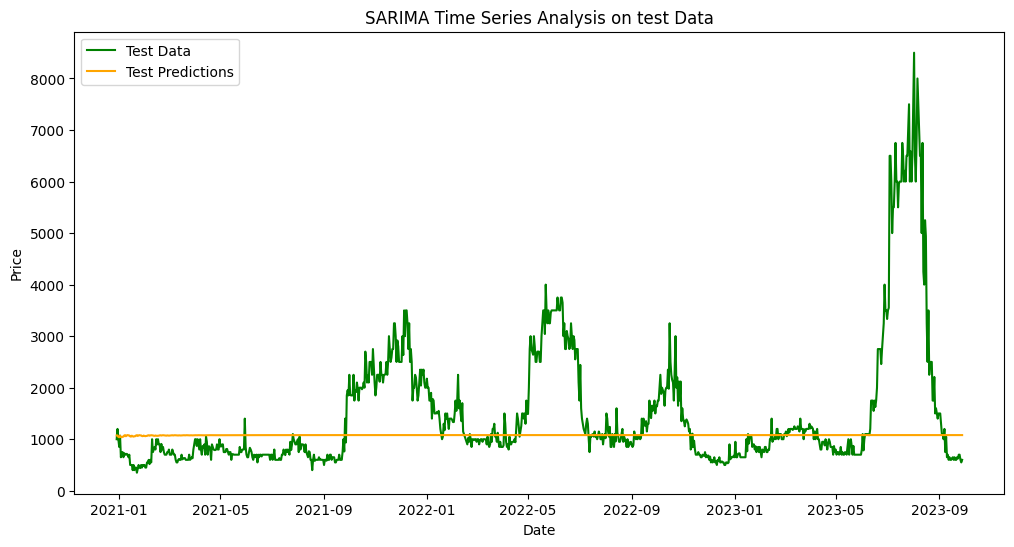

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(test_data_new.index, test_data_new['Price'], label='Test Data', color='green')
plt.plot(test_predictions_df_new.index, test_predictions_df_new, label='Test Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('SARIMA Time Series Analysis on test Data')
plt.show()